In [132]:
#Importing Libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
#read data
data = pd.read_csv("date-model-sale.csv")
data

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
...,...,...,...
46111,01-Jan-14,M74,1
46112,01-Jan-14,M59,1
46113,01-Jan-14,M60,5
46114,01-Jan-14,M54,1


In [3]:
#take a look at the data
data.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


In [4]:
# get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
# as we can observe from above informations, the date column can be converted into date type
data['Date']=pd.to_datetime(data['Date'])

type(data["Date"])


pandas.core.series.Series

In [6]:
# check whether there is any missing value in the dataset
observe_mis_values = data.isnull()

total_missing = data.isnull().sum()

total_values = data.count().sum()

percent = (data.isnull().sum()/data.count())*100

missing_data = pd.concat([total_missing,percent], axis=1, keys = ["Total", "Percent"])
missing_data

,Total,Percent
Date,0,0.0
Model,0,0.0
Count,0,0.0


In [7]:
#add date, month, and year to the data and observe the data again!
data["month"] = data["Date"].dt.month
data["year"] = data["Date"].dt.year

data.head()

,Date,Model,Count,month,year
0,2016-08-31,M45,5,8,2016
1,2016-08-31,M121,3,8,2016
2,2016-08-31,M122,4,8,2016
3,2016-08-31,M91,10,8,2016
4,2016-08-31,M66,57,8,2016


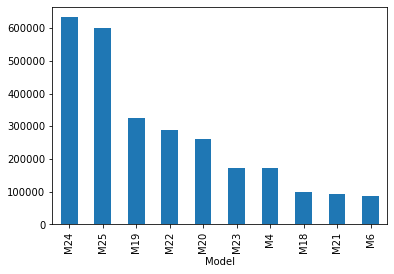

In [8]:
#observe the best selling products-models
sales_products = data.groupby("Model")["Count"].sum().sort_values(ascending = False)
sales_products

sales_products[:10].plot(x = "Model", y="Total Sales for Each Model", kind = "bar")
plt.show()

<AxesSubplot:title={'center':' Total Number of Items Sold in Each Year'}, xlabel='year', ylabel='count'>

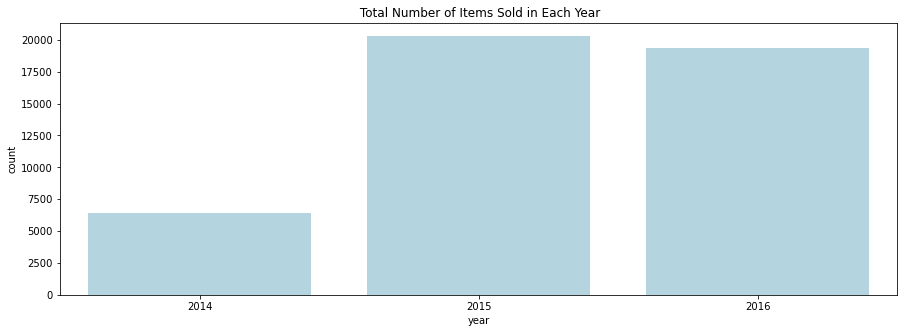

In [9]:
plt.figure(figsize=(15,5))
plt.title(' Total Number of Items Sold in Each Year')
sns.countplot(x='year', data=data, color='lightblue')

In [10]:
#look at the boundaries of the dates (min-max) and observe that the year 2016 is not completed so there is more product to sell in 2016.
min(data["Date"]), max(data["Date"])

(Timestamp('2014-01-01 00:00:00'), Timestamp('2016-08-31 00:00:00'))

In [11]:
## determine sales in different years in new data set

data_2014 = data[data["Date"].dt.year == 2014]
data_2015 = data[data["Date"].dt.year == 2015]
data_2016 = data[data["Date"].dt.year == 2016]

data_2014

,Date,Model,Count,month,year
39682,2014-12-31,M54,3,12,2014
39683,2014-12-31,M60,76,12,2014
39684,2014-12-31,M1,65,12,2014
39685,2014-12-31,M52,49,12,2014
39686,2014-12-31,M118,8,12,2014
...,...,...,...,...,...
46111,2014-01-01,M74,1,1,2014
46112,2014-01-01,M59,1,1,2014
46113,2014-01-01,M60,5,1,2014
46114,2014-01-01,M54,1,1,2014


In [12]:
# evaluate the graphs for monthly sales within each year uniqely and look for patterns

<AxesSubplot:title={'center':' Sale on each month of 2014 '}, xlabel='month', ylabel='Sale amount'>

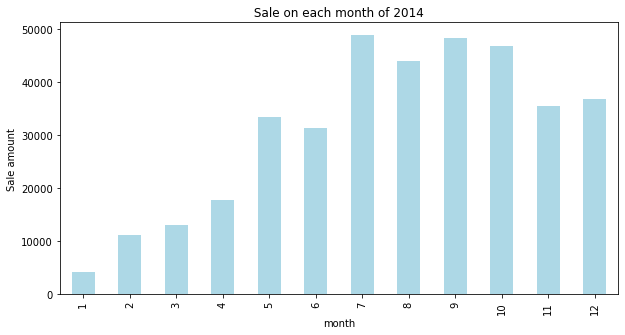

In [13]:
#Sell on each month of 2014
plt.figure(figsize=(10,5))
plt.title(' Sale on each month of 2014 ')
plt.ylabel('Sale amount')
data_2014.groupby('month').Count.sum().plot(kind='bar', color='lightblue')

<AxesSubplot:title={'center':' Sale on each month of 2015 '}, xlabel='month', ylabel='Sale amount'>

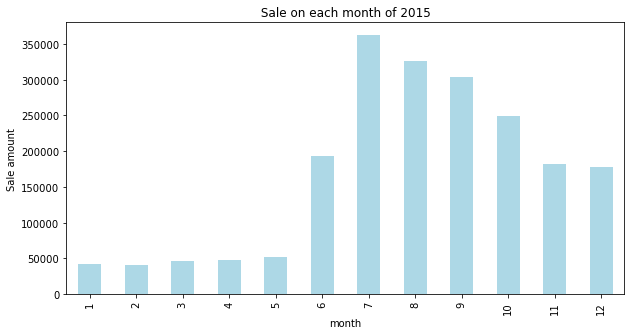

In [14]:
#Sell on each month of 2015
plt.figure(figsize=(10,5))
plt.title(' Sale on each month of 2015 ')
plt.ylabel('Sale amount')
data_2015.groupby('month').Count.sum().plot( kind='bar',color='lightblue')

<AxesSubplot:title={'center':' Sale on each month of 2016 '}, xlabel='month', ylabel='Sale amount'>

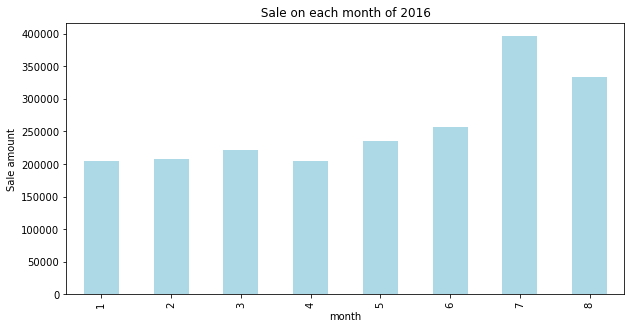

In [15]:
#Sell on each month of 2016
plt.figure(figsize=(10,5))
plt.title(' Sale on each month of 2016 ')
plt.ylabel('Sale amount')
data_2016.groupby('month').Count.sum().plot(kind='bar', color='lightblue')

In [16]:
# after observing each graph we can conclude that there is a remarkable increase in number of sales in July each year.

In [25]:
data['Date'] = data['month'].map(str) + '-' + data['year'].map(str)
sales = data.groupby(["Model", "year", "month"]).sum()
sales
#data['Date'] = data['month'].map(str) + '-' + data['year'].map(str)

#M = {}

unique_models = data["Model"].unique()

#for models in unique_models:
#    M[models] = data[data["Model"] == models].reset_index(drop=True)
    #M

In [26]:
#M_2 = {}

#for model in unique_models:
 #   for i in 0:len(M[model]):
  #          for j in 0:len(M[model]):
   #                 if M[model]["Date"][i]==M[model]["Date"][j]:
data                  

,Date,Model,Count,month,year
0,8-2016,M45,5,8,2016
1,8-2016,M121,3,8,2016
2,8-2016,M122,4,8,2016
3,8-2016,M91,10,8,2016
4,8-2016,M66,57,8,2016
...,...,...,...,...,...
46111,1-2014,M74,1,1,2014
46112,1-2014,M59,1,1,2014
46113,1-2014,M60,5,1,2014
46114,1-2014,M54,1,1,2014


In [27]:
#df =  M["M1"].set_index("month")
#data
df = sales["Count"]["M1"]
df
np.std(sales["Count"]["M1"])

894.5218185995337

In [28]:
sales["Count"]["M1"].index
df2 = sales["Count"]["M1"].to_frame().set_index(sales["Count"]["M1"].index)
df2
type(df2)
df2 = df2.sort_index()


In [29]:
std_dev = {}
sum_model = {}
for model in unique_models:
    std_dev[model] = np.std(sales["Count"][model])

for model in unique_models:
    sum_model[model] = np.sum(sales["Count"][model])
    
sum_model,std_dev
km = pd.DataFrame()

km_sum = pd.DataFrame.from_dict(sum_model, orient='index',
                       columns=["Count"])
km_std_dev = pd.DataFrame.from_dict(std_dev, orient='index',
                       columns=["Std.Dev"])

In [30]:
km["Count"] = km_sum["Count"]/10
km["Standard Deviation"] = km_std_dev["Std.Dev"]
km

,Count,Standard Deviation
M45,4419.1,3512.201565
M121,981.5,437.630712
M122,559.1,217.722186
M91,248.7,438.486816
M66,2291.5,2559.802619
...,...,...
M54,1403.0,642.951552
M29,2016.6,1332.169632
M34,2513.5,1502.649904
M33,1502.5,984.190307


AttributeError: 'numpy.ndarray' object has no attribute 'format'

In [32]:
#Clustering using K- means
#Segmentation using Age and Spending Score
'''Age and spending Score'''
#X1 = data[['Age' , 'Spending Score (1-100)']].values
inertia = []
 # KMEANS PARAMATER DEFINITIONS: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(km)
    inertia.append(algorithm.inertia_)
inertia

[16496388873.621725,
 4753153038.6661415,
 2355893517.8184743,
 675236566.8827935,
 448410535.80214465,
 316138982.85093063,
 199266068.51283255,
 158265105.82410866,
 118446817.65416217,
 90384221.28042729]

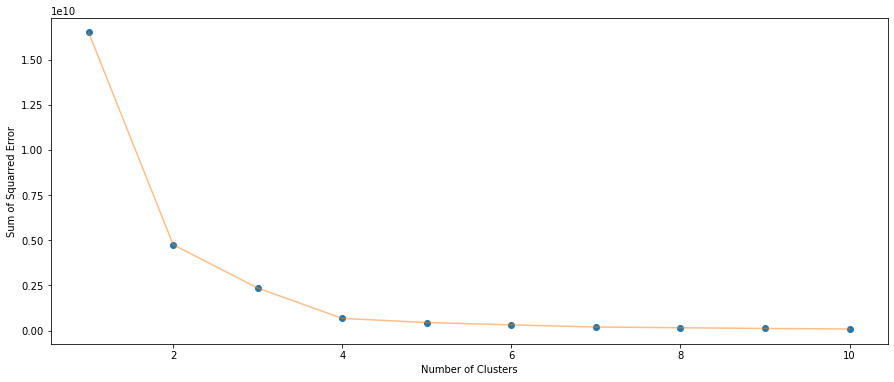

In [33]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Sum of Squarred Error')
plt.show()

In [34]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(km)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

labels1, centroids1


cluster_map = pd.DataFrame()
cluster_map['data_index'] = km.index.values
cluster_map['cluster'] = labels1

cluster_map[cluster_map.cluster == 1]["data_index"]

centroids1,labels1, 

cluster_0 = cluster_map[cluster_map.cluster == 0]["data_index"]
cluster_1 = cluster_map[cluster_map.cluster == 1]["data_index"]
cluster_2 = cluster_map[cluster_map.cluster == 2]["data_index"]
cluster_3 = cluster_map[cluster_map.cluster == 3]["data_index"]

cluster_0,cluster_1,cluster_2,cluster_3

(44    M22
 58     M4
 79    M20
 84    M19
 Name: data_index, dtype: object,
 0       M45
 1      M121
 2      M122
 3       M91
 4       M66
        ... 
 119     M54
 120     M29
 121     M34
 122     M33
 123    M106
 Name: data_index, Length: 116, dtype: object,
 30    M18
 57    M23
 Name: data_index, dtype: object,
 68    M24
 78    M25
 Name: data_index, dtype: object)

In [35]:
h = 100
x_min, x_max = km["Count"].min(), km["Count"].max()
y_min, y_max = km["Standard Deviation"].min(), km["Standard Deviation"].max()

## arrange() generates outputs between min and max within specified intervals
## meshgrid() returns two 2-dimensional arrays, representing the X and Y coordinates of all the points. 
## ravel() specify all of the values of an array in one row (each column includes only one value)
## np.c_ concenation of two raveled arrays 
## use algorithm.predict to estimate the clusters for each value in concenated xx and yy (algorithm is defined under KMeans)
## PREDICT FUCNTION : https://www.askpython.com/python/examples/python-predict-function

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
x_min,x_max,y_min,y_max

(0.3, 63296.8, 0.0, 49856.70788035113)

TypeError: 'Text' object is not iterable

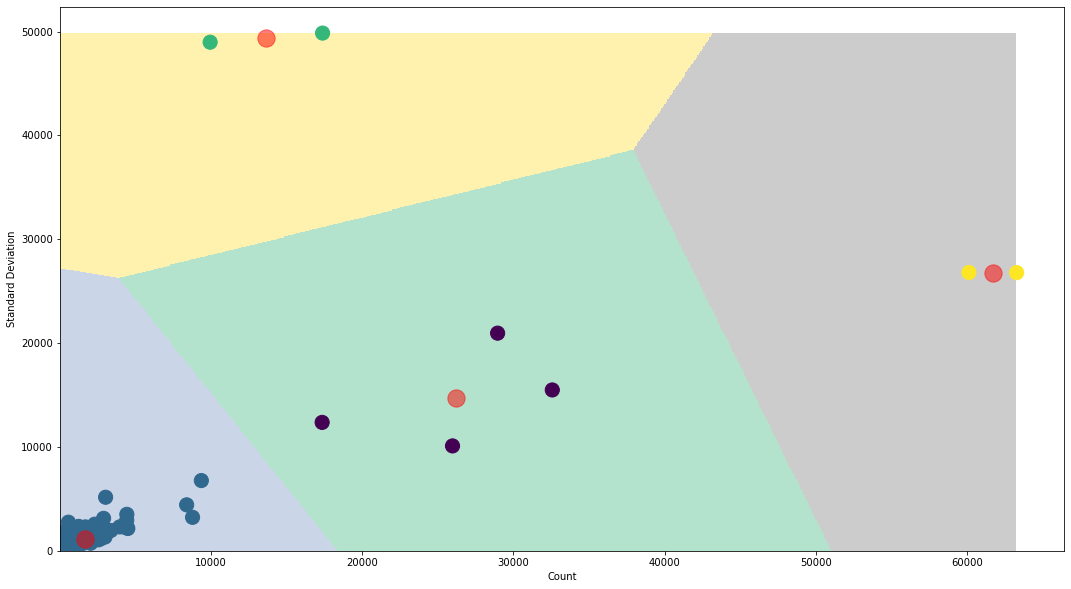

In [36]:
plt.figure(figsize = (18 , 10) )
plt.clf() # used to clear the current figure.
Z = Z.reshape(xx.shape) ##https://www.geeksforgeeks.org/reshape-numpy-array/
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = "Count" , y = "Standard Deviation" , data = km , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel("Standard Deviation" , plt.xlabel("Count"))

plt.show()


In [88]:
m5= pd.DataFrame(sales["Count"]["M5"])
m5 = a.reset_index(drop=True)
m5_train = m5[:17]
m5_test =m5[17:]
model = ARIMA(m5_train, order=(0,2,0))
model_fit = model.fit()
model_fit.summary()
output_m5 = model_fit.forecast()
rmse_m5 = sqrt(mean_squared_error(m5_test, output_m5))
output_m5, m5_test, rmse_m5,

(17    880.0
 dtype: float64,
     Count
 17    762,
 118.00000000000023)

In [158]:
m45= pd.DataFrame(sales["Count"]["M45"])
m45 = m45.reset_index(drop=True)
m45, len(m45)
m45_train = m45[:17]
m45_test =m45[17:]
model = ARIMA(m45_train, order=(0,2,0))
model_fit = model.fit()
model_fit.summary()
output_m45 = model_fit.forecast()
rmse_m45 = sqrt(mean_squared_error(m45_test, output_m45))
mape_m45 = mean_absolute_percentage_error(m45_test, output_m45)*100
output_m45, m45_test, rmse_m45, mape_m45

(17    108.0
 dtype: float64,
     Count
 17    118,
 10.0,
 8.47457627118644)

(10    15808.3
 dtype: float64,
     Count
 10  15328,
 480.29999999999745,
 3.1334812108559333)

In [171]:
m6= pd.DataFrame(sales["Count"]["M6"])
m6 = m6.reset_index(drop=True)
m6_train = m6[:17]
m6_test =m6[17:]
model = ARIMA(m6_train, order=(0,0,0))
model_fit = model.fit()
model_fit.summary()
output_m6 = model_fit.forecast()
rmse_m6 = sqrt(mean_squared_error(m6_test, output_m6))
mape_m6 = mean_absolute_percentage_error(m6_test, output_m6)*100
output_m6, m6_test, rmse_m6, mape_m6

(17    4929.887143
 dtype: float64,
     Count
 17   3856,
 1073.887143298005,
 27.849770313744944)

In [188]:
m21= pd.DataFrame(sales["Count"]["M21"])
m21 = m21.reset_index(drop=True)
m21_train = m21[:16]
m21_test =m21[16:]
model = ARIMA(m21_train, order=(3,2,0))
model_fit = model.fit()
model_fit.summary()
output_m21 = model_fit.forecast()
rmse_m21 = sqrt(mean_squared_error(m21_test, output_m21))
mape_m21 = mean_absolute_percentage_error(m21_test, output_m21)*100
output_m21, m21_test, rmse_m21, mape_m21

(16    898.2972
 dtype: float64,
     Count
 16    814,
 84.2972004253121,
 10.355921428171019)

In [189]:
cluster_0,cluster_2,cluster_3

(44    M22
 58     M4
 79    M20
 84    M19
 Name: data_index, dtype: object,
 30    M18
 57    M23
 Name: data_index, dtype: object,
 68    M24
 78    M25
 Name: data_index, dtype: object)

In [190]:
m4= pd.DataFrame(sales["Count"]["M4"])
m4 = m4.reset_index(drop=True)
m4, len(m4)
m4_train = m4[:10]
m4_test =m4[10:]
model = ARIMA(m4_train, order=(0,0,0))
model_fit = model.fit()
model_fit.summary()
output_m4 = model_fit.forecast()
rmse_m4 = sqrt(mean_squared_error(m4_test, output_m4))
mape_m4 = mean_absolute_percentage_error(m4_test, output_m4)*100
output_m4, m4_test, rmse_m4, mape_m4

(10    15808.3
 dtype: float64,
     Count
 10  15328,
 480.29999999999745,
 3.1334812108559333)

In [217]:
m22= pd.DataFrame(sales["Count"]["M22"])
m22 = m22.reset_index(drop=True)
m22_train = m22[:14]
m22_test =m22[14:]
model = ARIMA(m22_train, order=(0,0,1))
model_fit = model.fit()
model_fit.summary()
output_m22 = model_fit.forecast()
rmse_m22 = sqrt(mean_squared_error(m22_test, output_m22))
mape_m22 = mean_absolute_percentage_error(m22_test, output_m22)*100
output_m22, m22_test, rmse_m22, mape_m22

(14    17749.752704
 dtype: float64,
     Count
 14  14232,
 3517.752704271945,
 24.71720562304627)

In [231]:
m18= pd.DataFrame(sales["Count"]["M18"])
m18 = m18.reset_index(drop=True)
m18_train = m21[:16]
m18_test =m21[16:]
model = ARIMA(m18_train, order=(3,2,0))
model_fit = model.fit()
model_fit.summary()
output_m18 = model_fit.forecast()
rmse_m18 = sqrt(mean_squared_error(m18_test, output_m18))
mape_m18 = mean_absolute_percentage_error(m18_test, output_m18)*100
output_m18, m18_test, rmse_m18, mape_m18

(16    898.2972
 dtype: float64,
     Count
 16    814,
 84.2972004253121,
 10.355921428171019)

In [245]:
m23= pd.DataFrame(sales["Count"]["M23"])
m23 = m23.reset_index(drop=True)
m23_train = m23[:2]
m23_test =m23[2:]
model = ARIMA(m23_train, order=(0,0,0))
model_fit = model.fit()
model_fit.summary()
output_m23 = model_fit.forecast()
rmse_m23 = sqrt(mean_squared_error(m23_test, output_m23))
mape_m23 = mean_absolute_percentage_error(m23_test, output_m23)*100
output_m23, m23_test, rmse_m23, mape_m23

(2    60859.5
 dtype: float64,
    Count
 2  51987,
 8872.499999999985,
 17.066766691672893)

In [262]:
m24= pd.DataFrame(sales["Count"]["M24"])
m24 = m24.reset_index(drop=True)
m24_train = m24[:17]
m24_test =m24[17:]
model = ARIMA(m24_train, order=(1,2,0))
model_fit = model.fit()
model_fit.summary()
output_m24 = model_fit.forecast()
rmse_m24 = sqrt(mean_squared_error(m24_test, output_m24))
mape_m24 = mean_absolute_percentage_error(m24_test, output_m24)*100
output_m24, m24_test, rmse_m24, mape_m24

(17    31295.57445
 dtype: float64,
     Count
 17  23254,
 8041.574450429693,
 34.581467491312004)

In [280]:
m25= pd.DataFrame(sales["Count"]["M25"])
m25 = m25.reset_index(drop=True)
m25_train = m25[:24]
m25_test =m25[24:]
model = ARIMA(m25_train, order=(3,0,0))
model_fit = model.fit()
model_fit.summary()
output_m25 = model_fit.forecast()
rmse_m25 = sqrt(mean_squared_error(m25_test, output_m25))
mape_m25 = mean_absolute_percentage_error(m25_test, output_m25)*100
output_m25, m25_test, rmse_m25, mape_m25

(24    28403.916462
 dtype: float64,
     Count
 24  26910,
 1493.9164615922346,
 5.5515290285850405)

In [265]:
len(m25)

25